## Imports

In [1]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [27]:
import sys
sys.path.append("../figures")

from where_chicago import WhereGrey, RetinaWhiten, TransformDico

ImportError: cannot import name 'WhatGender' from 'where_chicago' (C:\Users\Marion\PycharmProjects\WhereIsMyMNIST\dev\where_chicago.py)

## Rétine

In [3]:
from main import init
args = init(filename='../data/2019-07-23')
args

{'w': 28,
 'minibatch_size': 50,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 48,
 'N_eccentricity': 24,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True}

In [4]:
from retina_chicago import Retina
retina = Retina(args)

../tmp/retina_6_48_24_2_1.41_1718_dico.npy
Fichier retina_dico charge avec succes


## Transformations appliquées

In [5]:
transform = transforms.Compose([
                                WhereGrey(args),
                                RetinaWhiten(args),
                                TransformDico(retina)
                            ])

Si TransformDico est commenté ci-dessus, mettez transform_dico = False ci-dessous, et inversement.

In [6]:
transform_dico = True

## Dataset train

In [7]:
dataset_train = datasets.ImageFolder("../data/ChicagoFacesDataOrganized/train/", transform=transform)

In [8]:
print(len(dataset_train))

1000


In [9]:
gender = ["Homme", "Femme"]

Ici, c'est hommes = 0, femmes = 1.

742 / 1000
Femme 13824 [-1.20020963e-01 -1.80022653e-02 -9.69173187e-03  8.68724724e-02
  2.22009411e-01 -7.34512037e-03 -9.96485892e-02 -4.14085237e-02
 -9.05330017e-02  9.38537002e-02  1.03130750e-01  3.91295703e-01
  1.84397081e-01 -2.43336359e-01  2.81881050e-02 -2.42729013e-02
 -1.37217934e-01  2.51999769e-01  2.46412995e-01 -1.39920713e-01
 -8.93667134e-01  1.60248313e+00 -6.38690975e-01  1.35901631e-01
 -2.81048253e-01  4.69826843e-01  2.36415626e+00  2.04523561e+00
  7.70361216e-01  9.58451985e-01  4.31001807e+00  2.14256526e+00
  1.21807623e+00  8.70686408e-01  1.37750829e+00 -3.90669393e-01
 -3.68437824e-01  2.71826879e-01 -2.00770562e-01 -2.04084644e+00
 -7.02428815e-01 -1.06508840e+00  5.39743464e-01 -3.93924317e+00
 -9.89150468e-01  2.74169058e+00 -1.35223900e+01 -3.59817956e+00
  9.78021504e-02  3.51896085e-02]


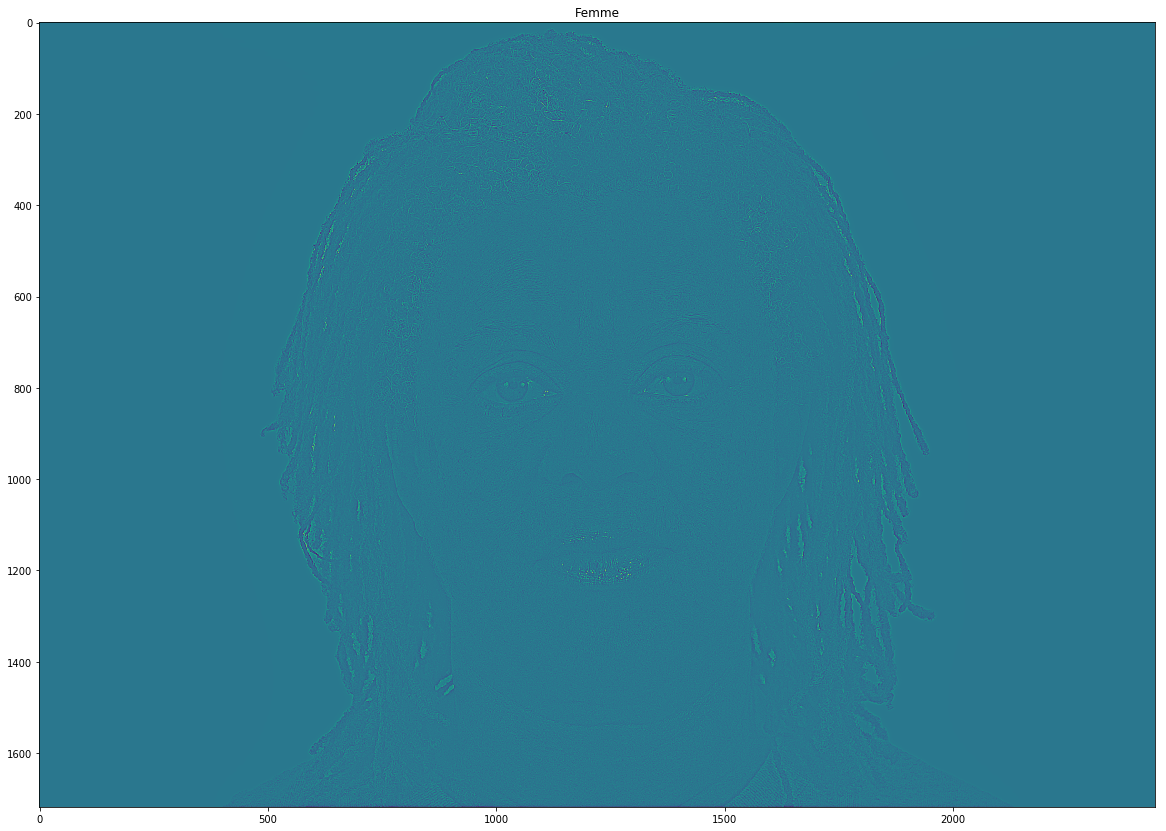

In [26]:
# Pour faire fonctionner cette case, verifiez que transform_dico ait la bonne valeur 
# dans la section Transformations appliquees

index_image = np.random.randint(len(dataset_train))
print(index_image, "/", len(dataset_train))

if not transform_dico :
    image, label = dataset_train[index_image]
    plt.figure(figsize=(20,20))
    plt.imshow(image)
    plt.title(gender[label])
    plt.show()
else :
    data, label = dataset_train[index_image]
    pixel_fullfield, retina_features = data
    plt.figure(figsize=(20,20))
    plt.imshow(pixel_fullfield)
    plt.title(gender[label])
    print(gender[label], len(retina_features), retina_features[0:50])

## Dataset test

In [11]:
dataset_test = datasets.ImageFolder("../data/ChicagoFacesDataOrganized/test/")

In [12]:
print(len(dataset_test))

126


## Dataloaders

In [13]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True
                                          )

In [14]:
batch_data_train, batch_label_train = next(iter(train_loader))

In [23]:
print(len(batch_data_train))
print(len(batch_data_train[0]), len(batch_data_train[0][0]), len(batch_data_train[0][0][0]))
print(len(batch_data_train[1]), len(batch_data_train[1][0]))

2
50 1718 2444
50 13824


In [16]:
print(batch_label_train)

tensor([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 1])


4 / 50
Homme 13824 tensor([ 6.9062e-02, -1.0579e-01,  1.9120e-01, -2.2681e-01, -2.0939e-01,
         3.3799e-01,  1.4745e-01, -2.3440e-01,  6.4274e-02,  5.1816e-01,
        -5.2611e-02,  3.3024e-01, -2.8847e-01,  3.3551e-01,  5.4498e-02,
         3.8317e-01,  3.3681e-02,  1.0714e-01,  2.2548e-02, -8.1636e-03,
        -2.8713e-01,  1.2302e-01, -1.2136e-01,  1.0334e+00, -9.0530e-02,
         1.9711e-01, -1.7770e+00,  3.2243e+00, -7.5466e-02,  1.0113e+00,
         4.7453e-01, -2.3528e+00,  7.2265e-01, -2.8829e+00,  9.5421e-01,
        -1.6929e+00,  1.7334e+00, -1.2258e+00, -6.0964e-01,  9.3856e-02,
         1.2067e+00, -1.0699e+00, -1.1247e+00,  8.1731e-01, -1.4051e+01,
         5.6375e+00, -1.0402e+01,  1.1885e+00, -1.2457e-02,  4.9626e-02],
       dtype=torch.float64)


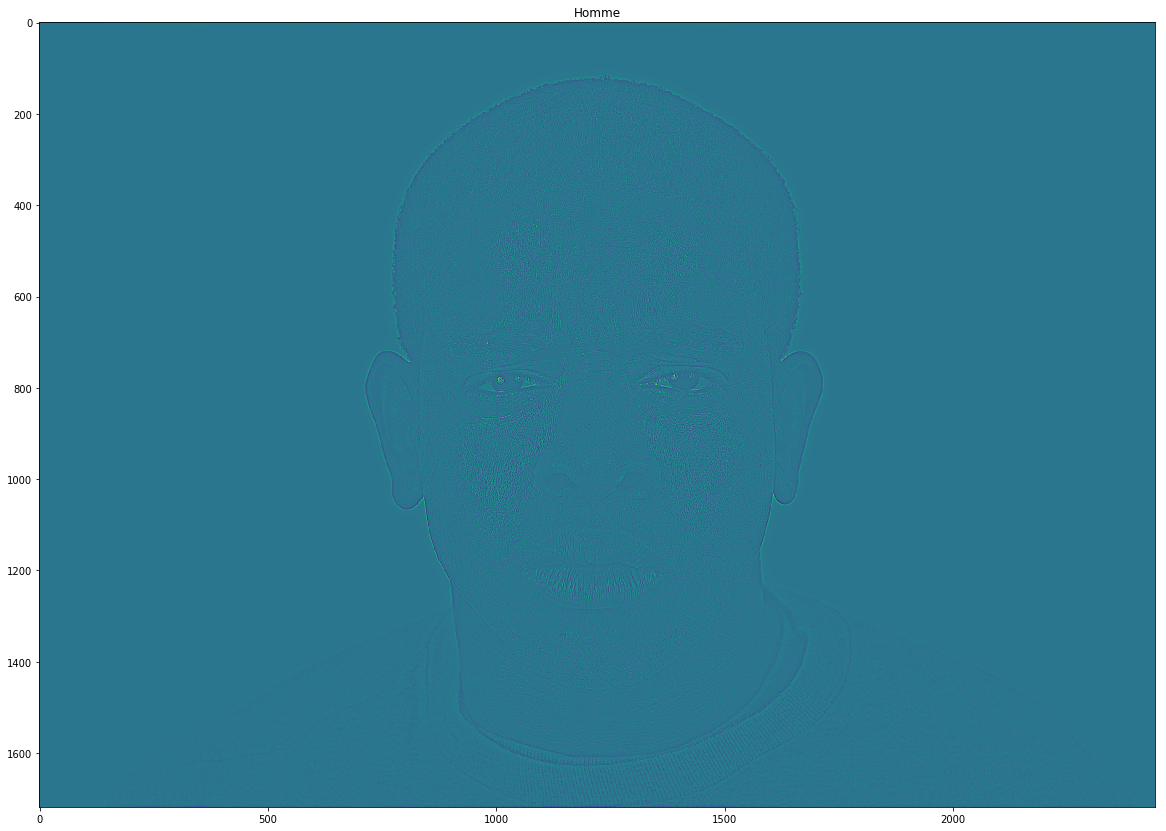

In [24]:
# Pour faire fonctionner cette case, verifiez que transform_dico ait la bonne valeur 
# dans la section Transformations appliquees

index_image2 = 4
print(index_image2, "/", len(batch_data_train[0]))

if not transform_dico :
    image2, label2 = batch_data_train[index_image2], batch_label_train[index_image2]
    plt.figure(figsize=(20,20))
    plt.imshow(image2)
    plt.title(gender[label2])
    plt.show()
else :
    pixel_fullfield2, retina_features2 = batch_data_train[0][index_image2], batch_data_train[1][index_image2]
    label2 = batch_label_train[index_image2]
    plt.figure(figsize=(20,20))
    plt.imshow(pixel_fullfield2)
    plt.title(gender[label2])    
    print(gender[label2], len(retina_features2), retina_features2[0:50])